In [54]:
import pandas as pd

data = pd.read_csv("E:/Data Science/CSV dataset/StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [55]:
#Printing the summary of the dataset

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [56]:
# Printing the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Observation ::
* It looks like that there are no null/NaN values present in the dataset. So we don't need to impute or fill the values in the dataset

------------------------------------------------------------------------------------------------------------

* Performing Exploratory analysis on the dataset

In [57]:
# Printing the column names in the dataset

data.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [58]:
# Defining a function that return value count function as output

def count_values(x):
    """
    Input = A column of the dataset
    Output = total unique values in that column and its count
    """
    
    val = x.value_counts()
    print("Total unique values and its count in the column is ::\n\n", val)

In [59]:
temp1 = data[['race/ethnicity']]
temp1.apply(count_values)

Total unique values and its count in the column is ::

 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


race/ethnicity    None
dtype: object

In [60]:
temp2 = data[['parental level of education']]
temp2.apply(count_values)

Total unique values and its count in the column is ::

 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


parental level of education    None
dtype: object

In [61]:
temp3 = data[['test preparation course']]
temp3.apply(count_values)

Total unique values and its count in the column is ::

 none         642
completed    358
Name: test preparation course, dtype: int64


test preparation course    None
dtype: object

# Plotting >>

* Plotting the dataset to visualize the various variables and the relation between them

In [62]:
# Importing the library for plotting

import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Box plot of all three scores ')

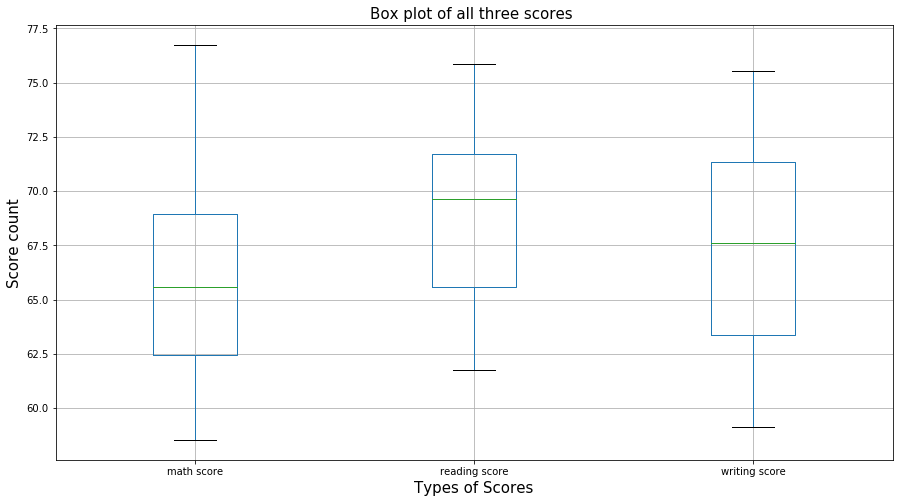

In [63]:
# Creating a pivot table to get the frequency of various categorial variables

table1 = data.pivot_table(values = ['math score', 'reading score', 'writing score'], index =['gender', 'race/ethnicity']) 

table1.plot(kind = 'box', figsize = (15,8), grid = True)

# Naming the axes and the plot

plt.xlabel("Types of Scores", fontsize = 15)
plt.ylabel("Score count",fontsize = 15)
plt.title("Box plot of all three scores ", fontsize = 15)

# Observation::
 
 * There are not outliers in all the three columns of math score, reading score and writing score  
 * Mean of different scores is near to each other
 * Mean of Reading score is highest among the three

Table showing the frequency and score counts ::
                        math score  reading score  writing score
gender race/ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366


Text(0.5, 1.0, 'Bar plot categorizing Gender and Ethnicity ')

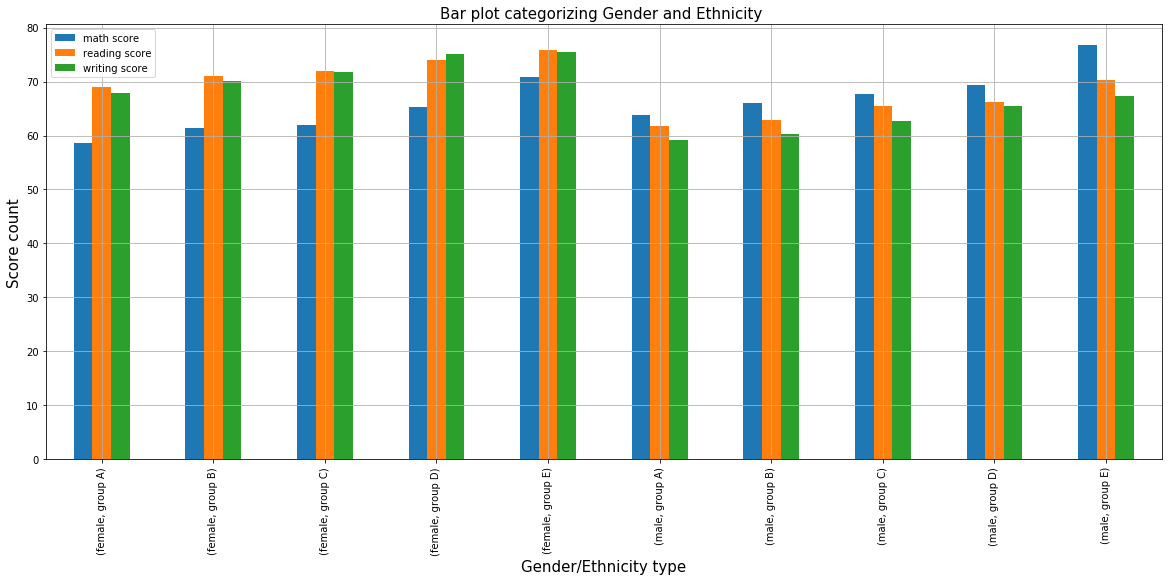

In [64]:
table1.plot(kind = 'bar', figsize = (20,8), grid = True)
print("Table showing the frequency and score counts ::\n", table1)

# Naming the axes and the plot

plt.xlabel("Gender/Ethnicity type", fontsize = 15)
plt.ylabel("Score count",fontsize = 15)
plt.title("Bar plot categorizing Gender and Ethnicity ", fontsize = 15)

Table showing the frequency and score counts ::
                 math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


Text(0.5, 1.0, 'Bar plot of all three scores ')

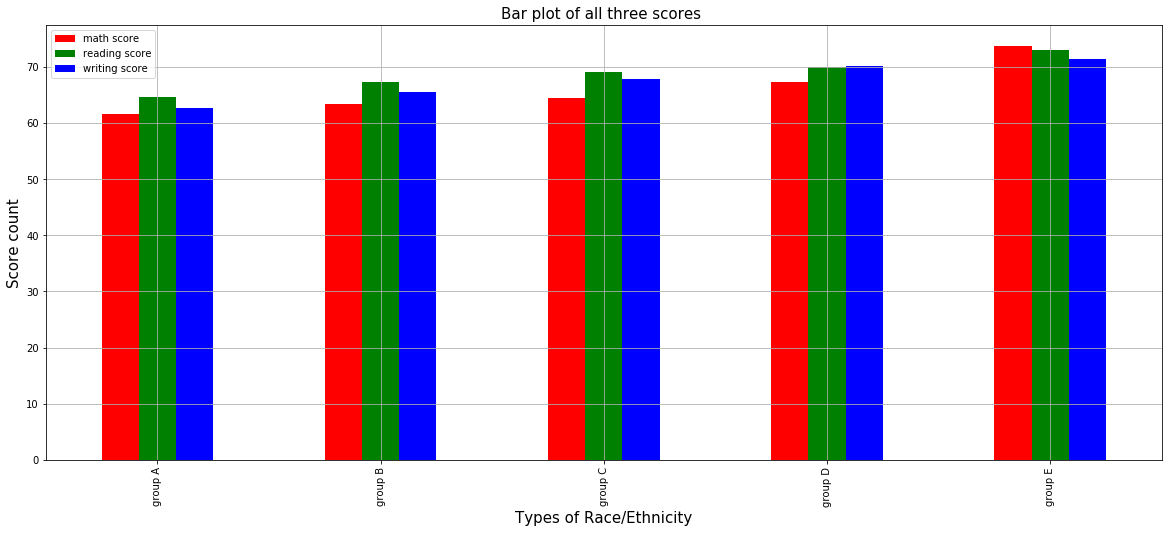

In [65]:
# Selecting other columns to see their effect on the scores

table2 = data.pivot_table(values = ['math score', 'reading score', 'writing score'], index = ['race/ethnicity'])
print("Table showing the frequency and score counts ::\n", table2)

#Plotiing the table

table2.plot(kind = 'bar', grid = True, color = ['red', 'green', 'blue'], figsize = (20,8))

# Naming the axes and the plot

plt.xlabel("Types of Race/Ethnicity", fontsize = 15)
plt.ylabel("Score count",fontsize = 15)
plt.title("Bar plot of all three scores ", fontsize = 15)

# Observation::

  * Group E has highest number of the scores among others

Table showing the frequency and score counts ::
                              math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


Text(0.5, 1.0, 'Bar plot of all three scores ')

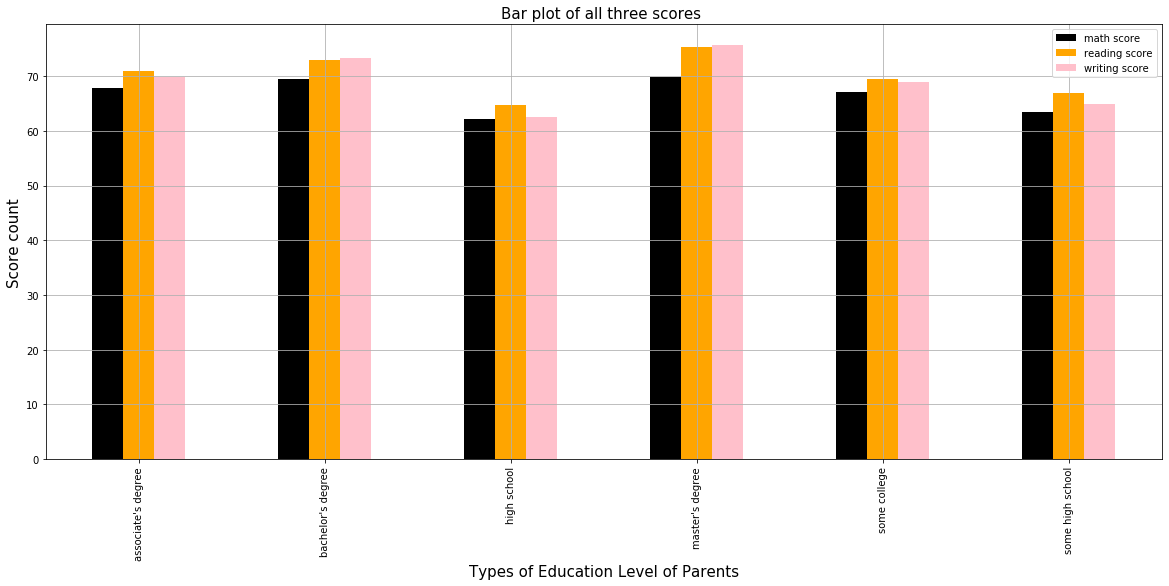

In [66]:
table3 = data.pivot_table(values = ['math score', 'reading score', 'writing score'], index = ['parental level of education'])
print("Table showing the frequency and score counts ::\n", table3)

# Plotting the table
table3.plot(kind = 'bar', grid = True, color = ['black', 'orange', 'pink'], figsize = (20,8))

# Naming the axes and the plot

plt.xlabel("Types of Education Level of Parents", fontsize = 15)
plt.ylabel("Score count",fontsize = 15)
plt.title("Bar plot of all three scores ", fontsize = 15)

# Observation::

  * Students with parents having Master's Degree has highest number of the scores among others
  * Students with parents having Bachelor's Degree has second highest number of the scores among others
  * Students with parents having Associate's Degree has third highest number of the scores among others

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7B7D09CC8>,
      dtype=object)

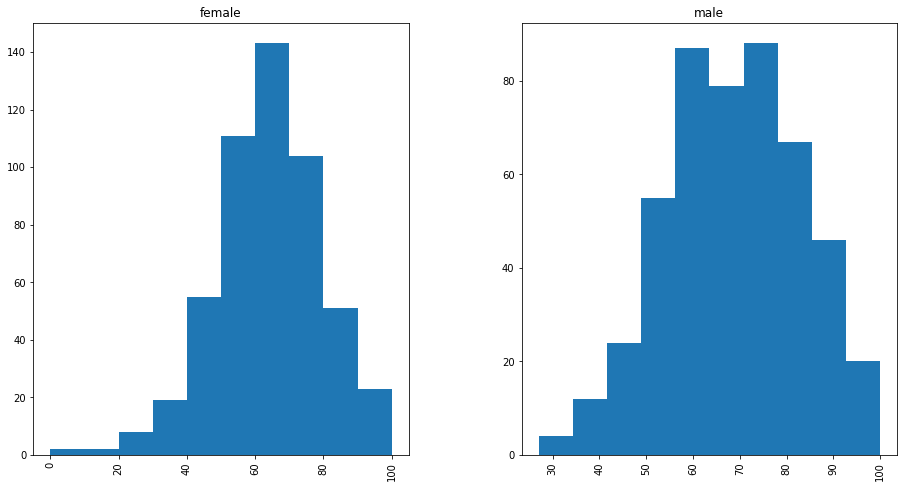

In [67]:
# Plotting the histplot to see variations along multiple types

data.hist(column = 'math score', by = 'gender', figsize = (15,8), grid = True)

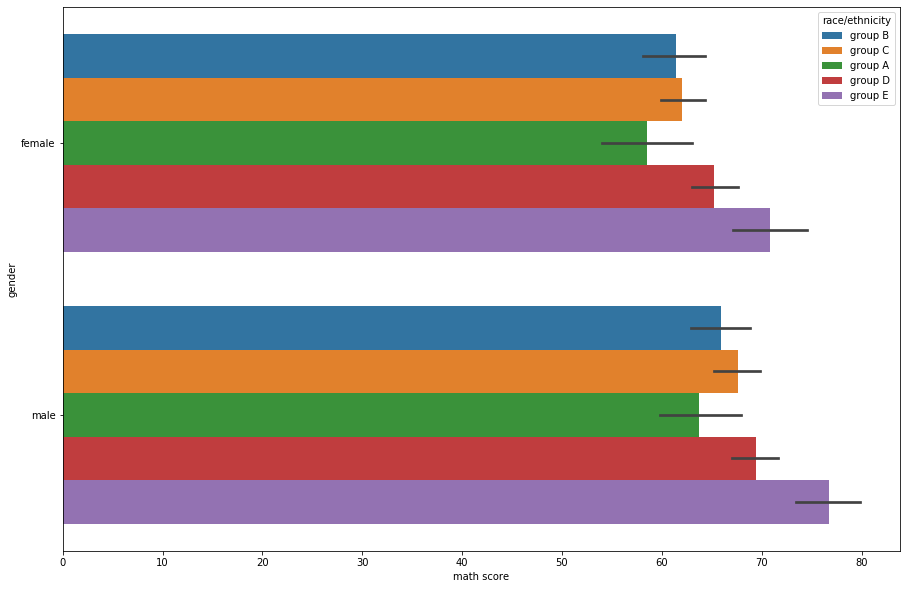

In [68]:
# Plotting math score by race/ethnicity

fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(x = data['math score'], y = data['gender'], hue = data['race/ethnicity'], orient = 'horizontal', ax = ax)

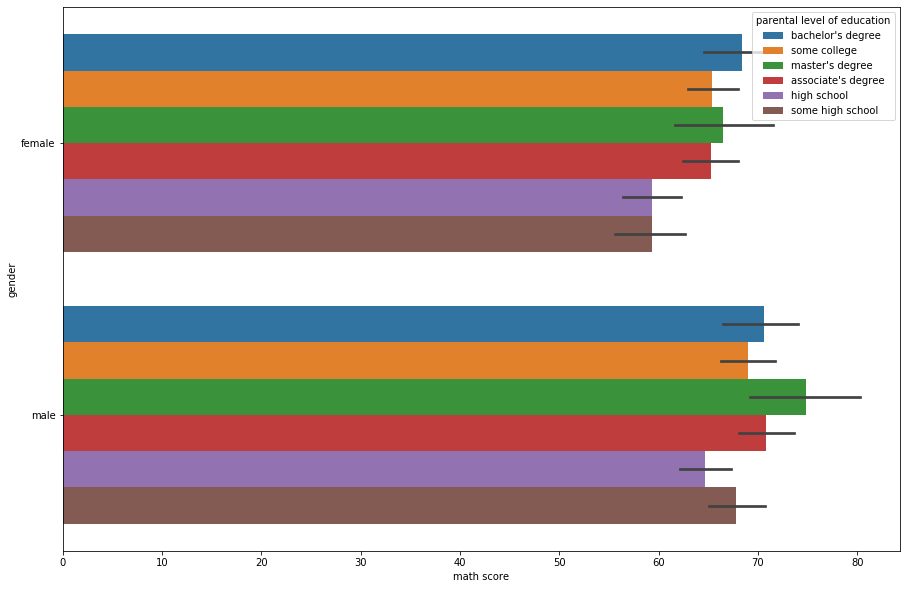

In [69]:
fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(x = data['math score'], y = data['gender'], hue = data['parental level of education'], ax = ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7B7CEE8C8>,
      dtype=object)

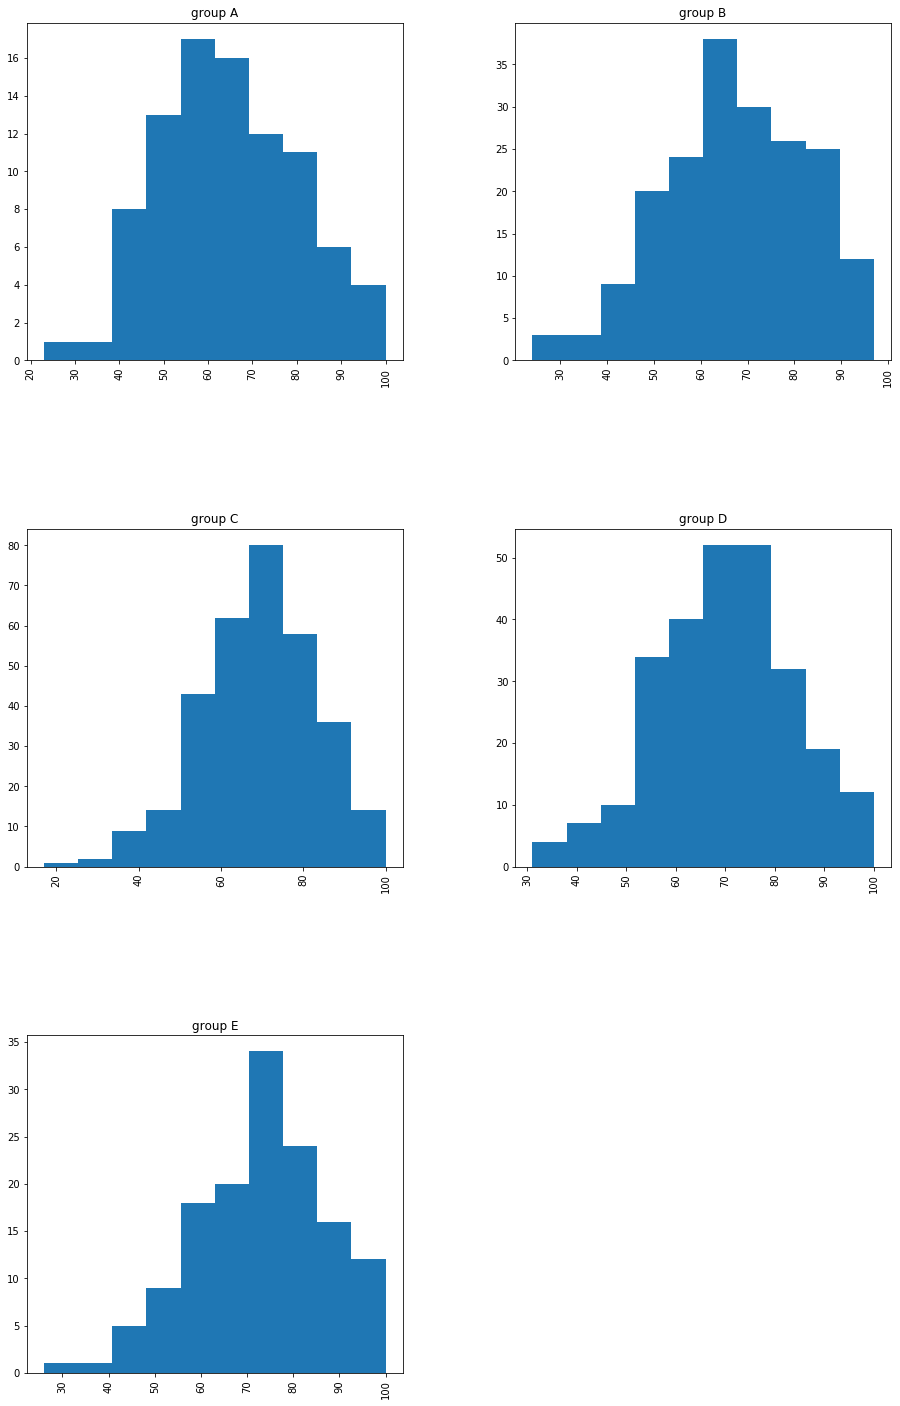

In [70]:
data.hist(column = 'reading score', by = 'race/ethnicity', figsize = (15,25), grid = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7B7F72D08>,
      dtype=object)

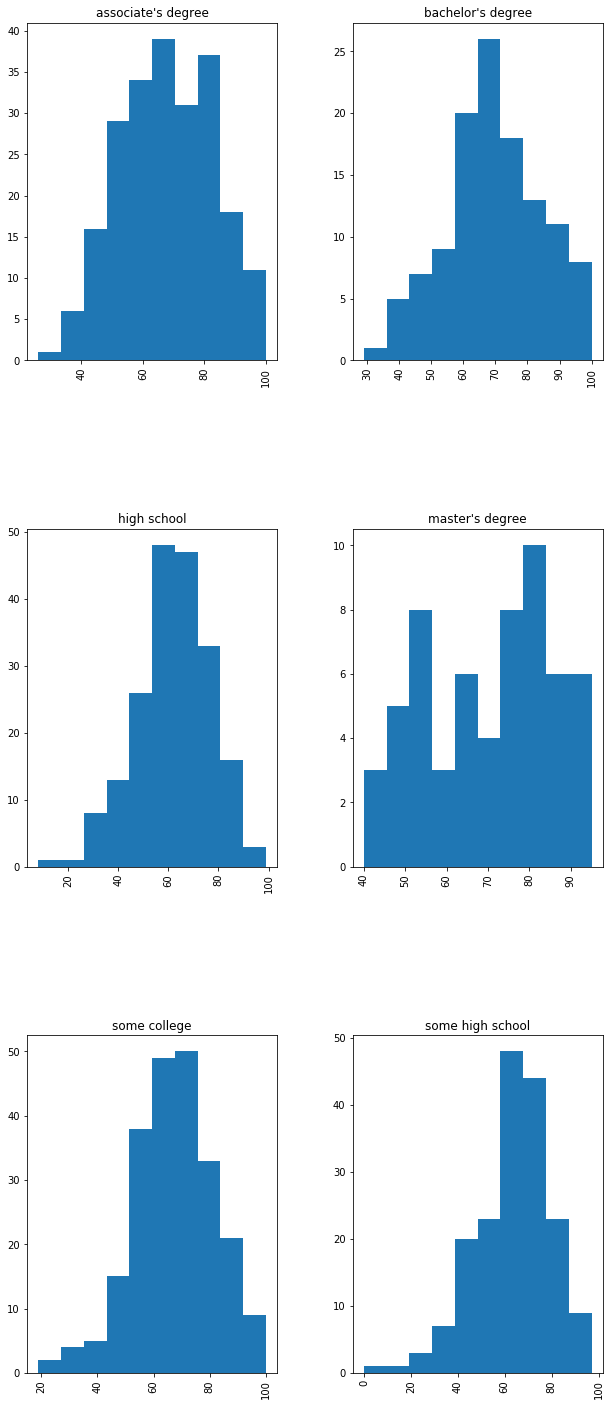

In [71]:
data.hist(column = 'math score', by = 'parental level of education', figsize = (10,25), grid = True)

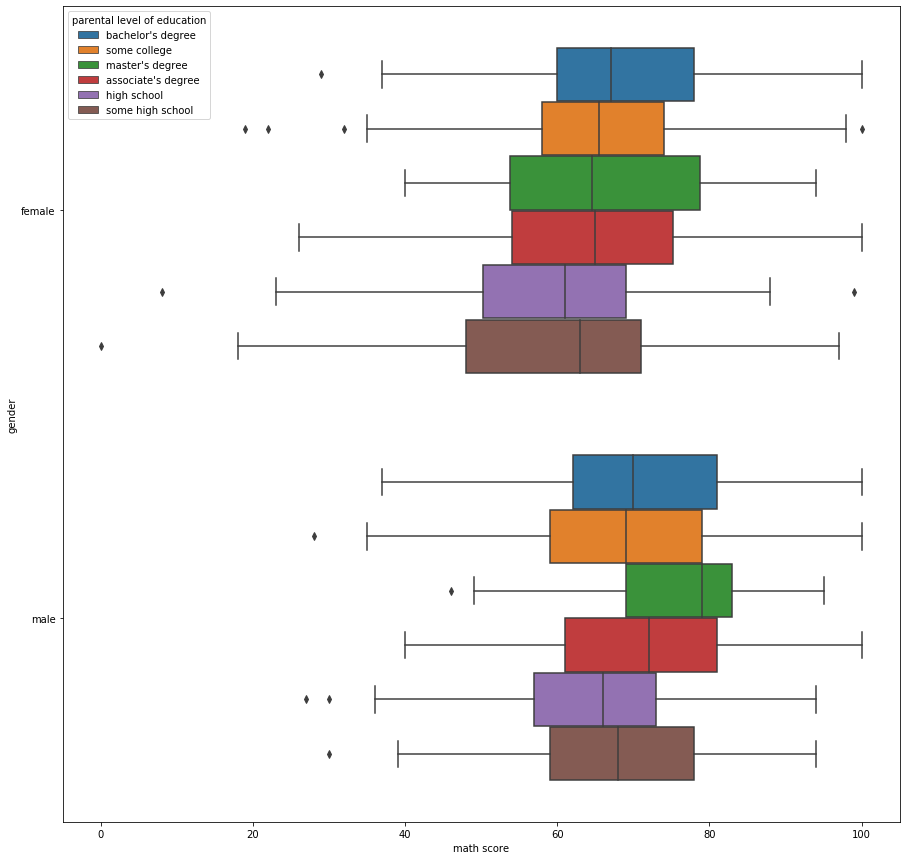

In [72]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(x = 'math score' , y = 'gender', hue = 'parental level of education', data = data , ax = ax)

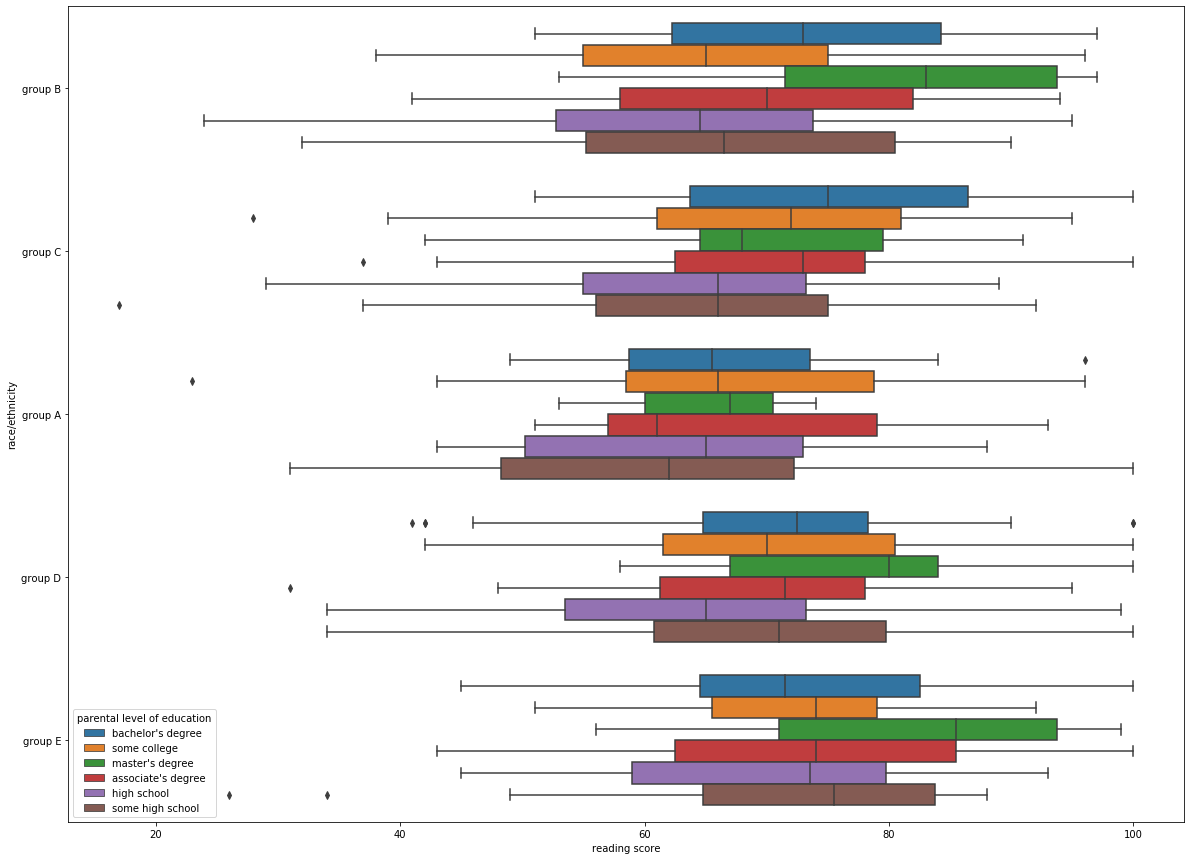

In [73]:
fig, ax = plt.subplots(figsize = (20,15))
sns.boxplot(x = 'reading score', y = 'race/ethnicity', hue = 'parental level of education', ax = ax, data = data)

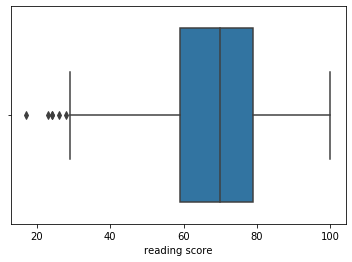

In [74]:
# Checking for any outliers in the scores column

sns.boxplot(x = 'reading score', data = data)

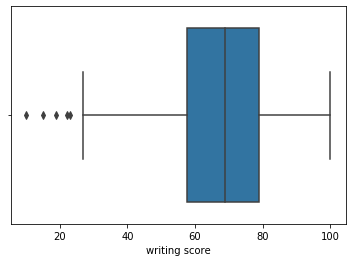

In [75]:
sns.boxplot(x = 'writing score', data = data)

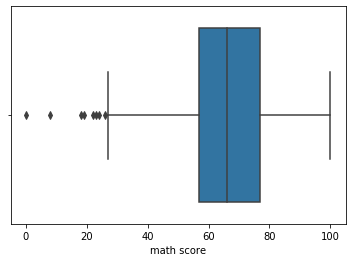

In [76]:
sns.boxplot(x = 'math score', data = data)

# Observation::

  * No need to deal with the outliers as their effect on the calculations won't be much

# Performing the One Sample t-test ::

 * <b>Null Hypothesis : Sample mean is same as the Population mean

In [77]:
# Defining the libraries for calculation

import numpy as np
import math


In [78]:
# Defining the variables  

#Selecting the population for evaluation 

population = np.array(data['math score'])

# Calculating population mean

pop_mean = np.mean(population)

print('Population Size is :: ', len(population))
print('\nPopulation mean is :: ', pop_mean)

Population Size is ::  1000

Population mean is ::  66.089


In [79]:
# Defining the sample and its mean

sample = np.array(data['math score'].sample(30))

print("Sample taken from population is : \n\n", sample)

#Calculating the sample mean

sample_mean = round(np.mean(sample), 3)
print('\nSample mean is :: ', sample_mean)


# Printing the sample size

print('\nPopulation Size is :: ', len(sample))

Sample taken from population is : 

 [71 40 74 73 82 42 75 60 58 90 72 65 69 46 62 73 49 67 59 52 55 63 71 53
 58 63 72 59 58 89]

Sample mean is ::  64.0

Population Size is ::  30


In [80]:
#  Performing the t-test now

import scipy.stats as stats

t_value, p_value = stats.ttest_1samp(sample, pop_mean)

print('t-value of the test is :: %.3f' %t_value)
print('\np-value of the test is :: %.3f'% p_value)


t-value of the test is :: -0.928

p-value of the test is :: 0.361


# Observation::

   * Since the calculated t-value is less than the prescribed value hence we are rejecting the null hypothesis
   * Conclusion : Sample mean is different from population mean

--------------------------------------------------------------------------------------------------------------------

# Performing the 2 Sample t-Test on the population :: 

In [81]:
# Selecting second sample from the population

sample_two = np.array(data['reading score'].sample(30))

print('Second sample from the population is :: \n\n', sample_two)

sample_two_mean = round(np.mean(sample_two), 3)

print("\n\nSecond Sample mean is ::  ", sample_two_mean)

Second sample from the population is :: 

 [61 88 70 81 49 75 83 88 72 76 76 74 64 85 86 74 77 88 90 73 64 54 86 74
 78 82 67 68 77 61]


Second Sample mean is ::   74.7


In [82]:
# Performing the 2 sample t test 

t_val, p_val = stats.ttest_ind(sample_two, sample)

t_val, p_val

print("t-value of both the samples is :: %.4f "% t_val)
print("\n\np-value of both the samples is :: %.4f"% p_val)

t-value of both the samples is :: 3.6326 


p-value of both the samples is :: 0.0006


# Observation ::
  
  * since p value is very low hence we are rejecting the null hypothesis 
  * p value is 0.0045 means that there is .45% chance that both the mean are same which is very low. Hence there is strong 
    evident that both the means are different
  * A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. 
    A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.  
  * t-value is greater hence we conclude that there is significant difference between the both samples mean 

# Performing the t-test using the formula

In [101]:
def one_samp_t_test(x1,x2,var,n1,n2):
    """
    Function to print the t_value and p_value using probability function
    x1 = sample mean
    x2 = population mean
    var = variance of the sample
    n1 = length of the sample
    n2 = length of the population
    """
    
    t_value = (x1 - x2) / math.sqrt(var(1/n1 + 1/n2))
    #p_value = stats.norm.pdf(t_value)                       # Not sure if this is correct
    print('t-value of the given sample is :: ', t_value)
    #print('\n\np-value of thegiven sample is:: ', p_value)

In [102]:
# getting the t value using the function

var = np.var(sample_mean)
one_samp_t_test(sample_mean, pop_mean, var, n1, n2)

TypeError: 'numpy.float64' object is not callable

# Performing the Z test :: 

  * Testing to check for any significant relationship between the two sample means of the population
  * If the probability of Z is small then the difference of two averages is more significant
  * The T-test is very similar to Z-test but it is used when number of observation for both categories is less than 30. 
  
       # Z- test = | x1 - x2 | / sqrt(s1^2/n1 + s2^2/n2)

In [91]:
import math

def z_test(samp1_mean, samp2_mean, var1, var2, n1, n2):
    """
    Function to perform the z test on two samples
    """
    z_score = round(abs(samp1_mean - samp2_mean) / math.sqrt((var1**2)/n1 + (var2**2)/n2), 3)
    cdf = round(stats.norm.cdf(z_score), 3)
    print('Z score for the given samples is :: ', z_score)
    print("Cumulation disctribution function value for the given Z score is:: ", cdf)

In [87]:
# Calculating the variance for both the sample means

variance1 = round(np.var(sample), 3)
variance2 = round(np.var(sample_two), 3)

# Printing the variances calculated

print('Variance of first sample is:: ', variance1)
print('\nVariance of second sample is:: ', variance2)

Variance of first sample is::  146.8

Variance of second sample is::  104.81


In [92]:
# Calling the z_test function to calculate the z score 

n1 = len(sample)
n2 = len(sample_two)
z_test(sample_mean, sample_two_mean, variance1, variance2,n1, n2)

Z score for the given samples is ::  0.325
Cumulation disctribution function value for the given Z score is::  0.627
